X.shape =  (32256, 2410)
X.T.shape =  (2410, 32256)
X.dtype =  float64
XTX.shape =  (2410, 2410)
shape of lam =  (2410,)
shape of np.diag(S_snap) =  (2410, 2410)


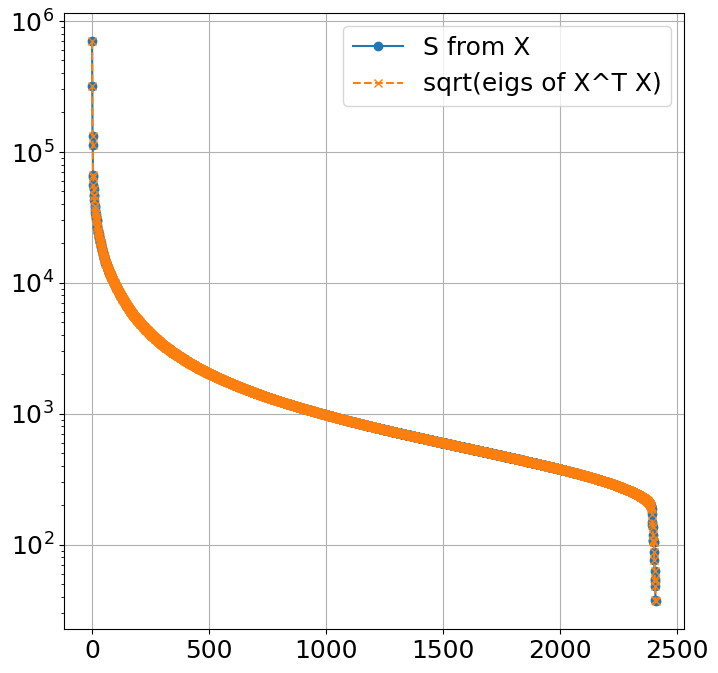

relative mismatch (top 50): 4.761442259014207e-16
cosine similarity (first 10): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


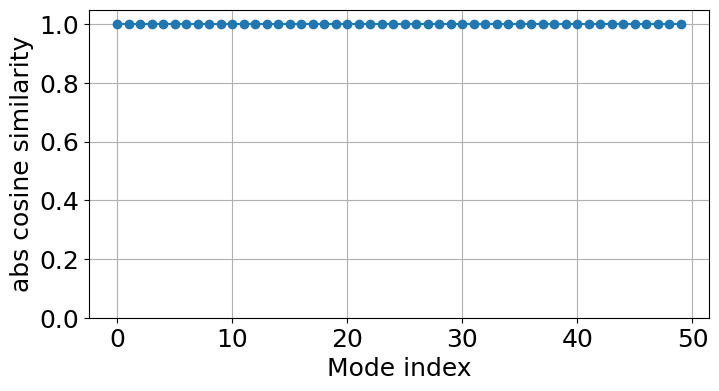

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('..','DATA','allFaces.mat'))
faces = mat_contents['faces']
m = int(np.squeeze(mat_contents['m']))
n = int(np.squeeze(mat_contents['n']))
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

X = faces.astype(np.float64)

print("X.shape = ", X.shape)
print("X.T.shape = ", X.T.shape)
print("X.dtype = ", X.dtype)
XTX = X.T @ X
print("XTX.shape = ", XTX.shape)

# SVD of X
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Method of snapshots
lam, V = np.linalg.eigh(XTX)  # eigenvalues ascending
idx = np.argsort(lam)[::-1]
lam = lam[idx]
V = V[:, idx]
S_snap = np.sqrt(np.clip(lam, 0, None))

print("shape of lam = ", lam.shape)
print("shape of np.diag(S_snap) = ", np.diag(S_snap).shape)

# Avoid dividing by zero for tiny singular values
S_safe = np.where(S_snap > 0, S_snap, 1.0)
U_snap = (X @ V) @ np.linalg.pinv(np.diag(S_snap))

plt.semilogy(S, 'o-', label='S from X')
plt.semilogy(S_snap, 'x--', label='sqrt(eigs of X^T X)')
plt.legend(); plt.grid(); plt.show()

print("relative mismatch (top 50):",
      np.linalg.norm(S[:50] - S_snap[:50]) / np.linalg.norm(S[:50]))

# Cosine similarity between corresponding columns of U and U_snap
k = 50
U_norm = U[:, :k] / np.linalg.norm(U[:, :k], axis=0, keepdims=True)
U_snap_norm = U_snap[:, :k] / np.linalg.norm(U_snap[:, :k], axis=0, keepdims=True)
cos_sim = np.abs(np.sum(U_norm * U_snap_norm, axis=0))
print("cosine similarity (first 10):", cos_sim[:10])

plt.figure(figsize=(8, 4))
plt.plot(cos_sim, 'o-')
plt.ylim(0, 1.05)
plt.xlabel('Mode index')
plt.ylabel('abs cosine similarity')
plt.grid()
plt.show()

In [30]:
print( "U.shape = ", U.shape )
print( "U_snapshot.shape = ", U_snap.shape )

U.shape =  (32256, 2410)
U_snapshot.shape =  (32256, 2410)


In [48]:
offset = 0
for i in range(10):
    idx = i + offset
    rel_mismatch = (
        np.linalg.norm(np.abs(U[:, idx]) - np.abs(U_snap[:, idx]))
        / np.linalg.norm(np.abs(U[:, idx]))
    )
    rel_mismatch = 0.0 if np.isclose(rel_mismatch, 0.0, atol=1e-6) else rel_mismatch

    print(f"Relative mismatch of U[:, {idx}] vs U_snapshot[:, {idx}]:", rel_mismatch)
    

offset = 2400
for i in range(10):
    idx = i + offset
    rel_mismatch = (
        np.linalg.norm(np.abs(U[:, idx]) - np.abs(U_snap[:, idx]))
        / np.linalg.norm(np.abs(U[:, idx]))
    )
    rel_mismatch = 0.0 if np.isclose(rel_mismatch, 0.0, atol=1e-12) else rel_mismatch

    print(f"Relative mismatch of U[:, {idx}] vs U_snapshot[:, {idx}]:", rel_mismatch)

Relative mismatch of U[:, 0] vs U_snapshot[:, 0]: 0.0
Relative mismatch of U[:, 1] vs U_snapshot[:, 1]: 0.0
Relative mismatch of U[:, 2] vs U_snapshot[:, 2]: 0.0
Relative mismatch of U[:, 3] vs U_snapshot[:, 3]: 0.0
Relative mismatch of U[:, 4] vs U_snapshot[:, 4]: 0.0
Relative mismatch of U[:, 5] vs U_snapshot[:, 5]: 0.0
Relative mismatch of U[:, 6] vs U_snapshot[:, 6]: 0.0
Relative mismatch of U[:, 7] vs U_snapshot[:, 7]: 0.0
Relative mismatch of U[:, 8] vs U_snapshot[:, 8]: 0.0
Relative mismatch of U[:, 9] vs U_snapshot[:, 9]: 0.0
Relative mismatch of U[:, 2400] vs U_snapshot[:, 2400]: 3.747622770686296e-10
Relative mismatch of U[:, 2401] vs U_snapshot[:, 2401]: 8.842110387931686e-11
Relative mismatch of U[:, 2402] vs U_snapshot[:, 2402]: 1.7690647893474917e-11
Relative mismatch of U[:, 2403] vs U_snapshot[:, 2403]: 2.0492721686604898e-11
Relative mismatch of U[:, 2404] vs U_snapshot[:, 2404]: 1.0301355448234268e-11
Relative mismatch of U[:, 2405] vs U_snapshot[:, 2405]: 1.508167339